## student name :- Prasad Balla
## student id :- 21031582 

## Import Libraries

In [1]:
import os
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
plt.rcParams.update({'font.size': 13})
# plt.style.use('tableau-colorblind10')

## Load Data

In [2]:
data = pd.read_csv('countries_of_the_world.csv')

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Data Preparation

### Drop Unnecessary Columns

In [5]:
data = data.drop(labels=['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)'],axis=1)

### Fill Missing Values

In [6]:
data['Agriculture'] = data['Agriculture'].fillna(0)
data['Industry'] = data['Industry'].fillna(0)
data['Service'] = data['Service'].fillna(0)

In [7]:
data['Country'] = data['Country'].str.strip()

### Replace Commas With Decimal & Empty String

In [8]:
data["Net migration"] = data["Net migration"].str.replace(",","") 
data["Birthrate"] = data["Birthrate"].str.replace(",","") 
data["Deathrate"] = data["Deathrate"].str.replace(",","") 
data['Agriculture'] = data['Agriculture'].str.replace(",",".") 
data["Industry"] = data["Industry"].str.replace(",",".") 
data["Service"] = data["Service"].str.replace(",",".") 
data['Literacy (%)'] = data['Literacy (%)'].str.replace(",",".")
data['Infant mortality (per 1000 births)'] = data['Infant mortality (per 1000 births)'].str.replace(",",".")
data['Birthrate'] = data['Birthrate'].str.replace(",",".")

### Change Data Types from String To Float

In [9]:
data['Agriculture'] = data['Agriculture'].astype(float)
data["Industry"] = data["Industry"].astype(float)
data["Service"] = data["Service"].astype(float)

In [10]:
data.loc[data['Country']=='Congo, Repub. of the','Country'] = 'ROT Congo'

### Filter Top 10 & Bottom 10 Nations By GDP

In [11]:
top10_gdp = data.sort_values('GDP ($ per capita)',ascending=False).iloc[:10].reset_index().drop('index',axis=1)
bottom10_gdp = data.sort_values('GDP ($ per capita)').iloc[:10].reset_index().drop('index',axis=1)

### Change Data Types from String To Float In Filtered Dataset

In [12]:
top10_gdp['Net migration'] = top10_gdp['Net migration'].astype('int64')
top10_gdp['Infant mortality (per 1000 births)'] = top10_gdp['Infant mortality (per 1000 births)'].astype(float)
top10_gdp['Birthrate'] = top10_gdp['Birthrate'].astype(float)
top10_gdp['Literacy (%)'] = top10_gdp['Literacy (%)'].astype(float)


bottom10_gdp['Net migration'] = bottom10_gdp['Net migration'].astype('int64')
bottom10_gdp['Infant mortality (per 1000 births)'] = bottom10_gdp['Infant mortality (per 1000 births)'].astype(float)
bottom10_gdp['Birthrate'] = bottom10_gdp['Birthrate'].astype(float)
bottom10_gdp['Literacy (%)'] = bottom10_gdp['Literacy (%)'].astype(float)

### Industry Split

In [13]:
def compute_sector_avg(data,labels):
    avg_agriculture = data[labels[0]].mean()
    avg_industry = data[labels[1]].mean()
    avg_services = data[labels[2]].mean()
    return np.array([np.round(avg_agriculture,2),np.round(avg_industry,2),np.round(avg_services,2)])

In [14]:
sector_labels  = ['Agriculture','Industry','Service']

In [15]:
top10_gdp_sector_avg = compute_sector_avg(top10_gdp,labels=sector_labels)
bottom10_gdp_sector_avg = compute_sector_avg(bottom10_gdp,labels=sector_labels)

C:\Users\prasa\AppData\Local\Temp/ipykernel_16192/2911280876.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[0].pie(x=top10_gdp_sector_avg,labels=sector_labels,autopct='%.0f%%',colors=colors)


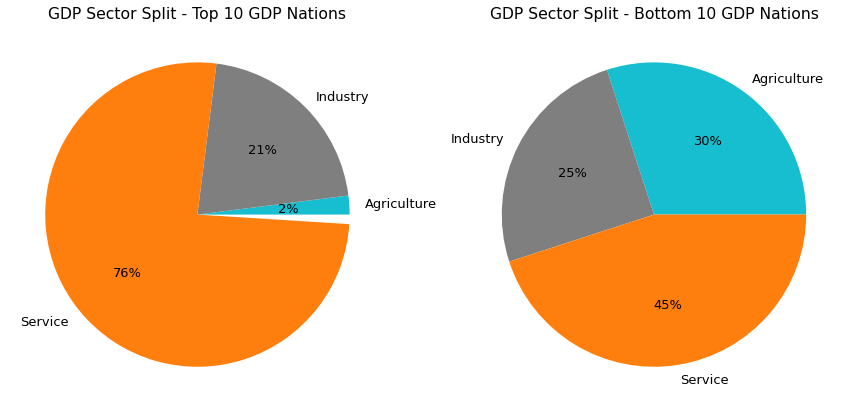

In [16]:
fig,ax = plt.subplots(1,2,figsize=(15,10))
colors = ['tab:cyan', 'tab:gray', 'tab:orange']
ax[0].pie(x=top10_gdp_sector_avg,labels=sector_labels,autopct='%.0f%%',colors=colors)
ax[0].set_title("GDP Sector Split - Top 10 GDP Nations")
ax[1].pie(x=bottom10_gdp_sector_avg,labels=sector_labels,autopct='%.0f%%',colors=colors)
ax[1].set_title("GDP Sector Split - Bottom 10 GDP Nations")
plt.savefig('gdp-sector-split.jpg')
plt.show()

### Net Migration

In [17]:
top10_gdp = top10_gdp.sort_values('Net migration',ascending=False).reset_index().drop('index',axis=1)
bottom10_gdp = bottom10_gdp.sort_values('Net migration',ascending=False).reset_index().drop('index',axis=1)

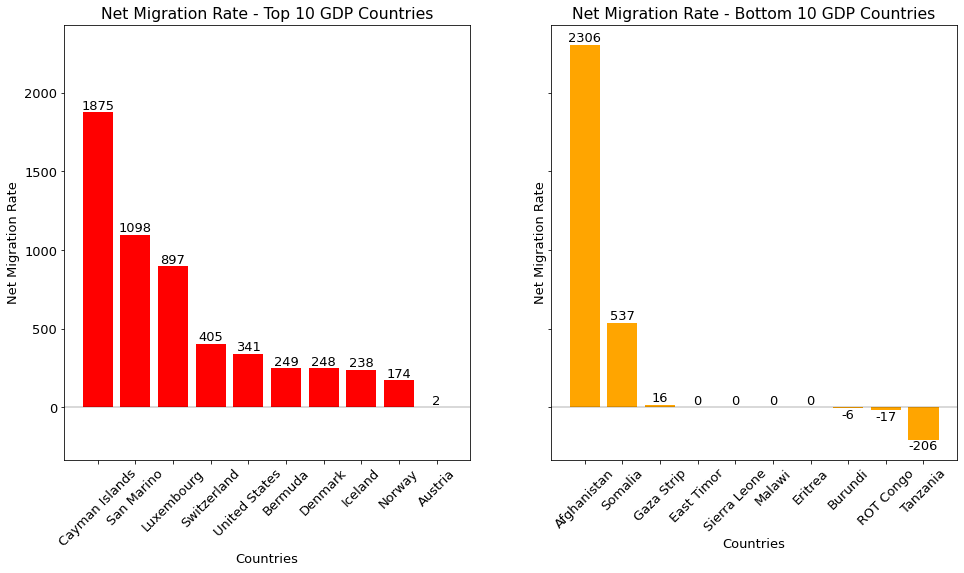

In [18]:
fig,ax = plt.subplots(1,2,figsize=(16,8),sharey=True)

b1 = ax[0].bar(x=top10_gdp['Country'],height=top10_gdp['Net migration'],color='r')
ax[0].axhline(0,color='black',linewidth=0.3)
ax[0].tick_params(axis='x',rotation=45)
ax[0].set_title('Net Migration Rate - Top 10 GDP Countries')
ax[0].set_xlabel('Countries')
ax[0].set_ylabel('Net Migration Rate')
ax[0].bar_label(b1,top10_gdp['Net migration'])

b2 = ax[1].bar(x=bottom10_gdp['Country'],height=bottom10_gdp['Net migration'],color='orange')
ax[1].axhline(0,color='black',linewidth=0.3)
ax[1].tick_params(axis='x',rotation=45)
ax[1].set_title('Net Migration Rate - Bottom 10 GDP Countries')
ax[1].set_xlabel('Countries')
ax[1].set_ylabel('Net Migration Rate')
ax[1].bar_label(b2,bottom10_gdp['Net migration'])

plt.savefig('net-migration-rate.jpg')
plt.show()

In [19]:
top10_gdp['label'] = 'top10gdp'
bottom10_gdp['label'] = 'bottom10gdp'

In [20]:
df = pd.concat([top10_gdp,bottom10_gdp]).reset_index().drop('index',axis=1)

In [21]:
color_list = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan'
              ,'lightgray','g','m','y','r','k','mediumblue','chocolate','goldenrod','orchid']
countries = df['Country']
color_dict = dict(zip(countries,color_list))

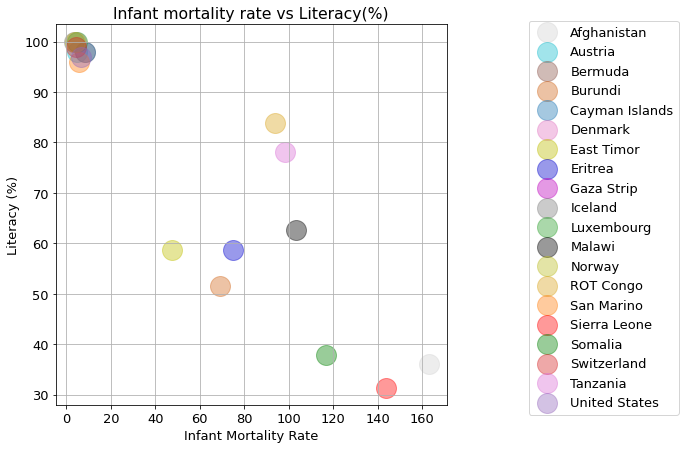

In [22]:
col1 = df['Infant mortality (per 1000 births)']
col2 = df['Literacy (%)']

fig, ax = plt.subplots(figsize=(7,7))

for country in np.unique(countries):
    idx = np.where(countries == country)
    ax.scatter(col1[idx[0][0]], col2[idx[0][0]], c = color_dict[country], label = country,s=400,alpha=0.4)
lgd = fig.legend(bbox_to_anchor=(1.05, 0.7, 0.3, 0.2), loc='upper left')

ax.set_title("Infant mortality rate vs Literacy(%)")
ax.set_xlabel('Infant Mortality Rate')
ax.set_ylabel('Literacy (%)')

ax.grid()

plt.savefig('imr-literacy.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

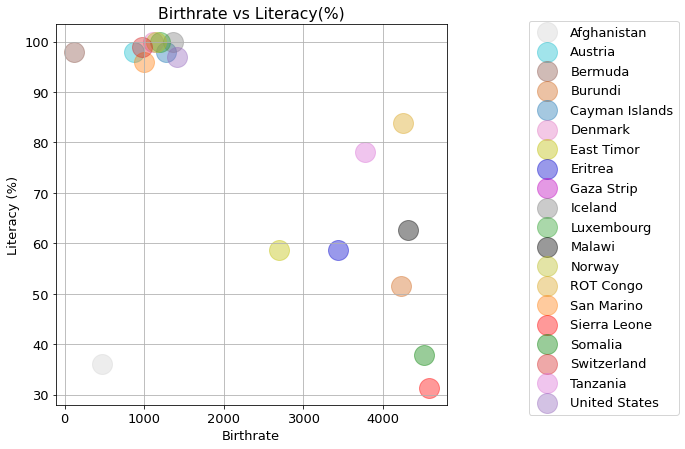

In [23]:
# fig,ax = plt.subplots(figsize=(7,7))

# text_to_annotate = df['Country']
col1 = df['Birthrate']
col2 = df['Literacy (%)']

# ax = plt.scatter(x=col1,y=col2) 

fig, ax = plt.subplots(figsize=(7,7))

for country in np.unique(countries):
    idx = np.where(countries == country)
    ax.scatter(col1[idx[0][0]], col2[idx[0][0]], c = color_dict[country], label = country,s=400,alpha=0.4)

lgd = fig.legend(bbox_to_anchor=(1.05, 0.7, 0.3, 0.2), loc='upper left')

ax.set_title("Birthrate vs Literacy(%)")
ax.set_xlabel('Birthrate')
ax.set_ylabel('Literacy (%)')

ax.grid()

plt.savefig('br-literacy.jpg',bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()